**Práctica 11: Agrupamiento de datos**

La diferencia entre _clasificación_ y _agrupamiento_ (inglés: clustering) es que en la primera ya existen categorías o etiquetas mientras en la segunda no se conoce ni cuáles ni cuántos grupos son; la idea es más bien descubrir sí o no los datos forman grupos con elementos similares de tal forma que los grupos todos difieren entre sí en algunos aspectos. Teniendo el agrupamiento, uno procede a investigar en qué sentido los elementos contenidos en cada grupo son similares y qué es lo que difiere entre un grupo y otro.

Para poder llevar a cabo un agrupamiento, uno primero necesita establecer una o más medidas de _similitud_ entre los datos o alternativamente una o más medidas de _distancia_: si la similitud entre los datos es alta, entonces la distancia entre ellos es baja y vice versa.

La forma más básica de iniciar es el uso de la distancia euclideana en el espacio de atributos numéricos. Con texto, una opción sería la distancia de Levenshtein (la llamada distancia de edición) y con cadenas binarias la distancia de Hamming. Para comparar conjuntos, se podría usar la distancia de Jaccard, por ejemplo. Existe un sinfin de propuestas para medidas de distancia para distintos tipos de atributos.

Como es de costumbre, seguimos un [tutorial sobre agrupamiento de la documentación de scikit-learn](https://scikit-learn.org/stable/modules/clustering.html).

Comenzamos con el algoritmo de _k_ medias que requiere como parámetro a cuántos grupos se quiere agrupar los datos. Se asignan _k_ centroides y se asocian los datos al centroide más cercano, iterativamente reacomodando los centroides para minimizar las distancias entre los datos y sus centroides.

31 integrantes en grupo 0
93 integrantes en grupo 1
91 integrantes en grupo 2


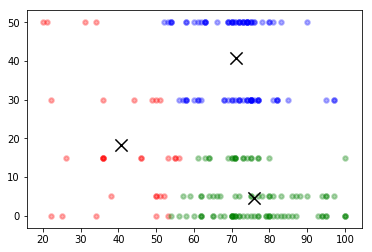

0.495351715509


In [2]:
import ssl
import pandas as pd
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import isnan, nan, take, where


seed(42)
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
keep = ['CF1op', 'hrsNum'] # dos atributos numéricos para comenzar
d = d.loc[:, keep]
d = d.dropna() # quitar los NAs
x = d.values
k = 3 # pedimos tres grupos
m = KMeans(init = 'random', n_clusters = k, n_init = 10)
m.fit(x)
centroides = m.cluster_centers_
grupos = m.predict(x)
plt.figure(1)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)
colores = ['r', 'g', 'b']
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.3, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

Pues, hay grupos. El sí o no tienen sentido los grupos que produjo _k_ medias requiere análisis adicional. Los del lado izquierdo pintan ser los que reprueban sin importar cuánto trabajan, los de arriba a la derecha sacan calificaciones mejores que los de la izquierda pero trabajan más que los de derecha abajo, mientras los de derecha abajo parecen sacar un poco mejores calificaciones que los de arriba, trabajando menos.

Probemos con diferentes valores de _k_ para ver cuál da el mejor valor de la coeficiente de silueta:

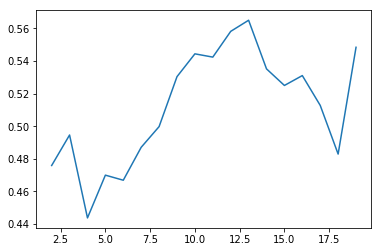

In [3]:
import ssl
import pandas as pd
from sklearn import metrics
from numpy.random import seed
import matplotlib.pyplot as plt
from numpy import isnan, nan, take, where
from sklearn.cluster import KMeans

seed(13)
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("https://elisa.dyndns-web.com/teaching/comp/datasci/modelar.csv")
keep = ['CF1op', 'hrsNum'] # dos atributos numéricos para comenzar
d = d.loc[:, keep]
d = d.dropna() # quitar los NAs
x = d.values
ks = [k for k in range(2, 20)]
sil = []
for k in ks:
    m = KMeans(init = 'random', n_clusters = k, n_init = 10)
    m.fit(x)
    sil.append(metrics.silhouette_score(x, m.predict(x), metric='euclidean'))
plt.figure(1)
plt.plot(ks, sil)
plt.show()

Otro algoritmo de agrupamiento en la librería de sklearn es la propagación de afinidad (similar al algoritmo de propagación de etiquetas LPA en su esencia). Lo demostro con datos artificiales ya que salen muchísimos grupos con los datos del caso de estudio por la naturaleza discretizada de los atributos categóricos.

80 integrantes en grupo 0
50 integrantes en grupo 1
75 integrantes en grupo 2


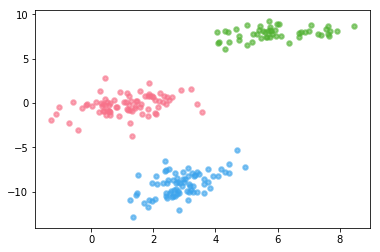

0.793817125768


In [4]:
import ssl
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, seed
from numpy import take, where, unique, concatenate
from sklearn.cluster import AffinityPropagation

seed(17)
g1 = multivariate_normal([1.3, 0.0], [[1, 0.4], [0.4, 1]], 80)
g2 = multivariate_normal([6.0, 8.0], [[1.2, 0.3], [0.3, 0.5]], 50)
g3 = multivariate_normal([3.0, -9.0], [[0.75, 0.6], [0.6, 2]], 75)
x = concatenate((g1, g2, g3))
m = AffinityPropagation(damping = 0.9, convergence_iter = 30)
c = m.fit(x)
grupos = c.labels_
plt.clf()
plt.figure(1)
k = len(unique(grupos))
colores = sns.color_palette("husl", k)
for g in range(k):
    incl = where(grupos == g)[0]
    print(len(incl), "integrantes en grupo", g)
    grupo = take(x, incl, 0)
    plt.scatter(grupo[:, 0], grupo[:, 1], marker='o', s=20, linewidths=2, color=colores[g], alpha = 0.6, zorder=5)
plt.show()
print(metrics.silhouette_score(x, grupos, metric='euclidean'))

Si los datos cuentan con _grafos_, también se puede agrupar a los vértices en términos de similitud estructural del grafo en sí. Esto se conoce como agrupamiento de grafos (inglés: graph clustering) o como [detección de comunidades](https://networkx.github.io/documentation/stable/reference/algorithms/community.html) y la librería networkx de python nos facilita rutinas para lograrlo.

Para el caso de estudio, se cuenta con [registros de ayuda](https://elisa.dyndns-web.com/teaching/mat/discretas/ad18/semana_1/sem_1.txt) de un alumno ayudando a otro, para cada semana que no fue un examen (1-7 + 9-15). Colocando un vértice por alumno y una arista dirigida entre ayudante y ayudado, se construye un grafo (ponderando las aristas con cuántas ayudas fueron, contando como fracciones las ayudas cuando fue más de un ayudante en una misma semana).

13


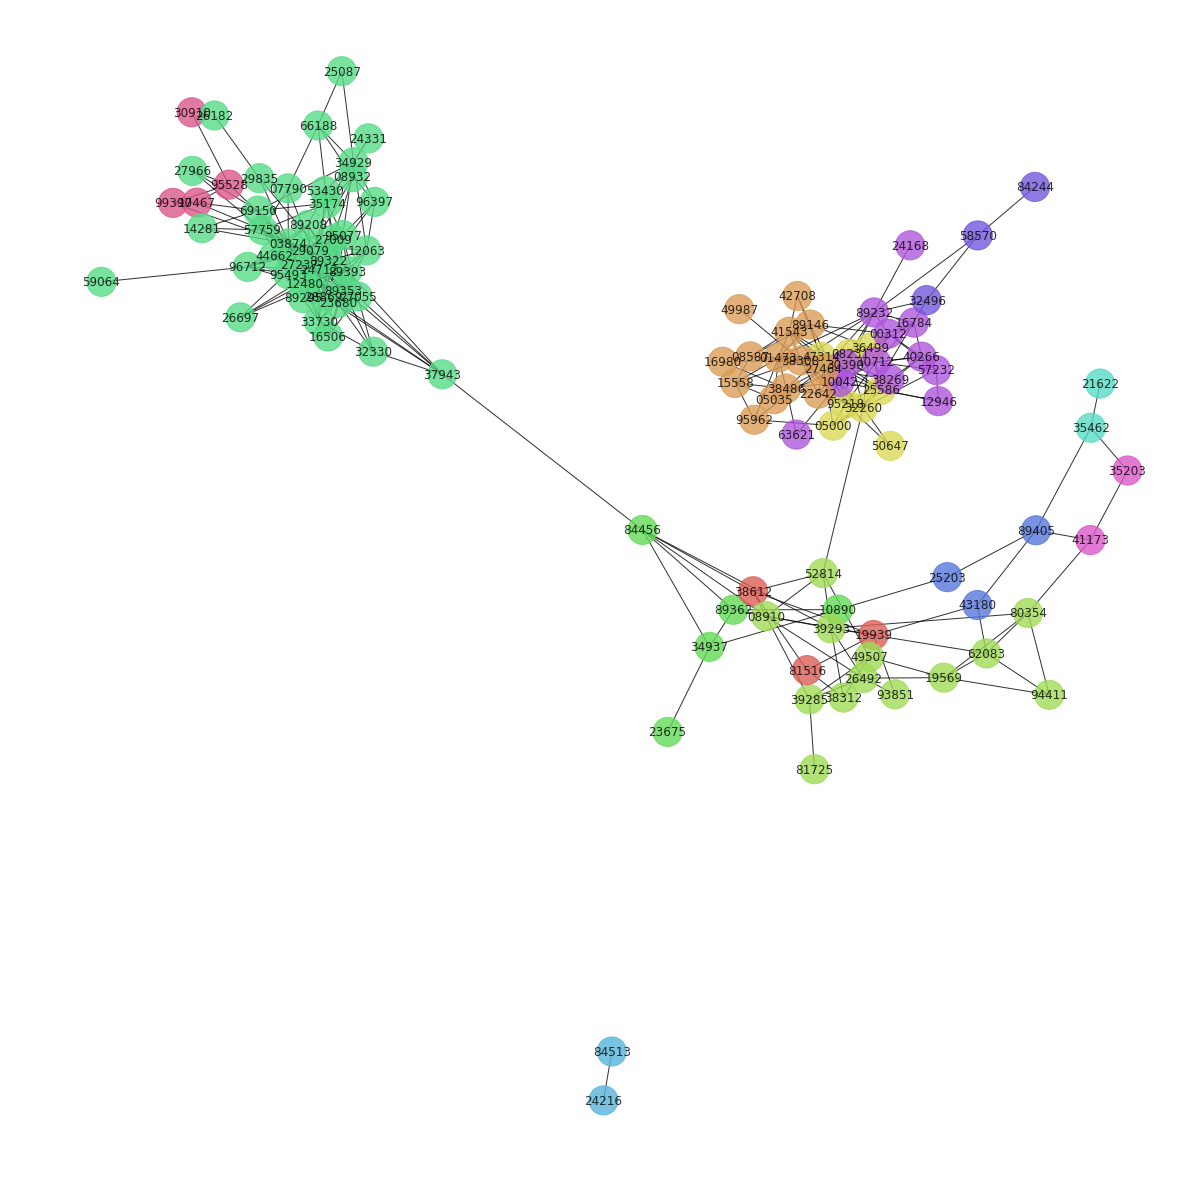

In [37]:
import ssl
import seaborn as sns
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from networkx.drawing.layout import spring_layout
from networkx.algorithms.community import label_propagation_communities

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
    
w = defaultdict(float) # ponderaciones

for s in [x for x in range(1, 8)] + [x for x in range(9, 16)]:
    url = "https://elisa.dyndns-web.com/teaching/mat/discretas/ad18/semana_{:d}/sem_{:d}.txt".format(s, s) 
    for line in urllib.request.urlopen(url):
        l = line.decode(encoding='utf-8',errors='ignore')
        if '#' in l: 
            continue
        l = l.strip()
        if len(l) > 0:
            matr = l.split()
            a = matr.pop(0) # quien recibe la ayuda
            contrib = 1 / len(matr)
            for h in matr: # los que ayudaron
                w[(a, h)] += contrib

G = nx.Graph()
for (a, h) in w:
    value = w[(a, h)]
    if value > 0:
        G.add_edge(h[2:], a[2:], weight = value)

plt.rcParams["figure.figsize"] = [16, 16]
pos = nx.spring_layout(G, k = 0.25)
gr = [g for g in label_propagation_communities(G)]
k = len(gr)
print(k)
palette = sns.color_palette("hls", k)
a = dict()
for g in gr:
    c = palette.pop()    
    for v in g:
        a[v] = c 
colors = [a[v] for v in G.nodes] 
nx.draw(G, node_color = colors, node_size = 850, alpha = 0.8, with_labels = True)
plt.show()

Del acomodo de los nodos con el método de resortes resalta que los alumnos son de tres horas distintas y mayormente ayudaron a los de su propia hora (de vez en cuando asisten clase en otras horas). Los colores que provienen de los trece grupos detectados por el método de propagación de etiquetas nos dicen que hay subgrupos de alumnos dentro de cada hora cuyas ayudas se concentran internamente en el subgrupo.

Estudiando los ejemplos de uso de los algoritmos del tutorial de sklearn, selecciona por lo menos dos algoritmos distintos para llevar a cabo agrupamiento con por lo menos dos atributos de tu caso de estudio (se puede aplicar PCA para lograr visualizaciones bidimensionales con mayores cantidades de atributos), reportando los hallazgos con gráficas y con medidas de calidad (checa sklearn.metrics).